<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
---- age ---
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5


C:\Users\gkish\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.7561752988047808


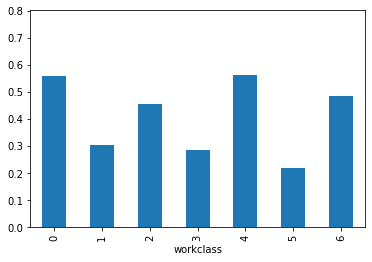

In [1]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

salary_dataset = pd.read_csv(r'C:/Users/gkish/Downloads/SD03Q08/SD03Q08/SD03Q08/train.csv')

salary_dataset.info()

salary_dataset.rename(columns={'capital.gain': 'capital gain', 'capital.loss': 'capital loss', 'native.country': 'country','hours.per.week': 'hours per week','marital.status': 'marital'}, inplace=True)
salary_dataset.columns

salary_dataset.isin(['?']).sum(axis=0)

# code will replace the special character to nan and then drop the columns 
salary_dataset['country'] = salary_dataset['country'].replace('?',np.nan)
salary_dataset['workclass'] =salary_dataset['workclass'].replace('?',np.nan)
salary_dataset['occupation'] =salary_dataset['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
salary_dataset.dropna(how='any',inplace=True)

#running a loop of value_counts of each column to find out unique values. 
for c in salary_dataset.columns:
    print ("---- %s ---" % c)
    print (salary_dataset[c].value_counts())


#dropping based on uniquness of data from the dataset 
salary_dataset.drop(['age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)
print(salary_dataset.head())


df = salary_dataset.replace({'sex':{' Male':0, ' Female':1},'target':{' <=50K':0, ' >50K':1}})


#race
df['race'] = df['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)
#education
df['education'] = df['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)
#occupation
df['occupation'] = df['occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, 
 ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)
print(df.head())


#plotting a bar graph for Education against Income to see the co-relation between these columns 
df.groupby('education').target.mean().plot(kind='bar')
df.groupby('occupation').target.mean().plot(kind='bar')
df.groupby('sex').target.mean().plot(kind='bar')
df.groupby('marital').target.mean().plot(kind='bar')
df.groupby('race').target.mean().plot(kind='bar')
df.groupby('workclass').target.mean().plot(kind='bar')



#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.target)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

salary_dataset1 =  pd.read_csv(r'C:/Users/gkish/Downloads/SD03Q08/SD03Q08/SD03Q08/test.csv')

salary_dataset1.info()

salary_dataset1.rename(columns={'capital.gain': 'capital gain', 'capital.loss': 'capital loss', 'native.country': 'country','hours.per.week': 'hours per week','marital.status': 'marital'}, inplace=True)
salary_dataset1.columns

salary_dataset1.isin(['?']).sum(axis=0)

# code will replace the special character to nan and then drop the columns 
salary_dataset1['country'] = salary_dataset1['country'].replace('?',np.nan)
salary_dataset1['workclass'] =salary_dataset1['workclass'].replace('?',np.nan)
salary_dataset1['occupation'] =salary_dataset1['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
salary_dataset1.dropna(how='any',inplace=True)

#running a loop of value_counts of each column to find out unique values. 
for c in salary_dataset1.columns:
    print ("---- %s ---" % c)
    print (salary_dataset1[c].value_counts())


#dropping based on uniquness of data from the dataset 
salary_dataset1.drop(['age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)
print(salary_dataset1.head())


df1 = salary_dataset1.replace({'sex':{' Male':0, ' Female':1},'target':{' <=50K.':0, ' >50K.':1}})


#race
df1['race'] = df1['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)
#marital
df1['marital'] = df1['marital'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
#workclass
df1['workclass'] = df1['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)
#education
df1['education'] = df1['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)
#occupation
df1['occupation'] = df1['occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, 
 ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)
#relationship
df1['relationship'] = df1['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)
print(df1.head())


#plotting a bar graph for Education against Income to see the co-relation between these columns 
df1.groupby('education').target.mean().plot(kind='bar')
df1.groupby('occupation').target.mean().plot(kind='bar')
df1.groupby('sex').target.mean().plot(kind='bar')
df1.groupby('marital').target.mean().plot(kind='bar')
df1.groupby('race').target.mean().plot(kind='bar')
df1.groupby('workclass').target.mean().plot(kind='bar')


#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df1_x = pd.DataFrame(np.c_[df1['relationship'], df1['education'], df1['race'],df1['occupation'],df1['sex'],df1['marital'],df1['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df1_y = pd.DataFrame(df1.target)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#Initialize the linear regression model
reg = LogisticRegression()




#Train our model with the training data
reg.fit(df_x, df_y)
#print our price predictions on our test data
y_pred = reg.predict(df1_x)


#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','sex','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])



#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(df1_y, y_pred))
